[*********************100%***********************]  1 of 1 completed


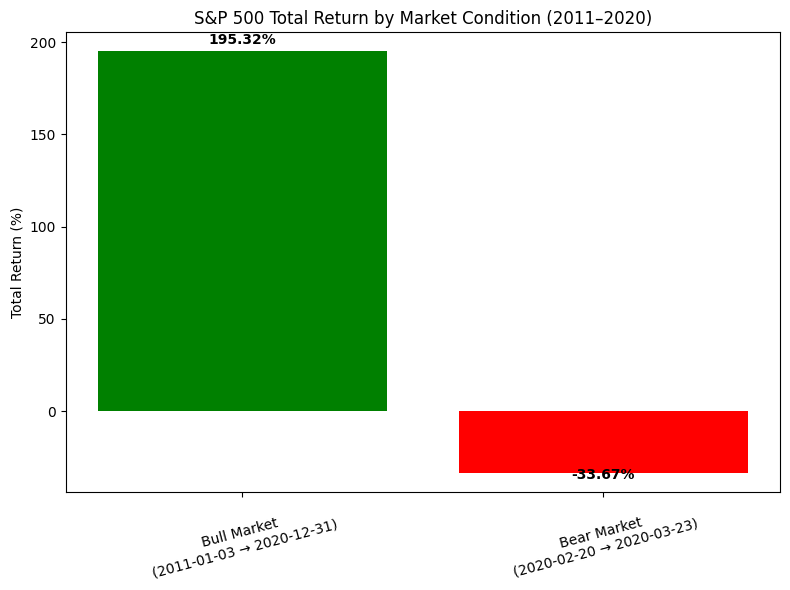

In [10]:

!pip install -q yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


sp500 = yf.download("^GSPC", start="2011-01-01", end="2021-01-01", auto_adjust=False)
sp500 = sp500.reset_index()[['Date', 'Close']]
sp500.columns = ['date', 'sp_close']
sp500['date'] = pd.to_datetime(sp500['date'])


def market_label(date):
    if pd.Timestamp("2020-02-20") <= date <= pd.Timestamp("2020-03-23"):
        return 'bear'
    else:
        return 'bull'

sp500['market_condition'] = sp500['date'].apply(market_label)


return_values = []
for condition in ['bull', 'bear']:
    condition_df = sp500[sp500['market_condition'] == condition]
    start_date = condition_df.iloc[0]['date'].strftime('%Y-%m-%d')
    end_date = condition_df.iloc[-1]['date'].strftime('%Y-%m-%d')
    start_price = condition_df.iloc[0]['sp_close']
    end_price = condition_df.iloc[-1]['sp_close']
    pct_return = round(((end_price - start_price) / start_price) * 100, 2)
    label = f"{condition.capitalize()} Market\n({start_date} → {end_date})"
    return_values.append((label, pct_return))


returns_df = pd.DataFrame(return_values, columns=['Market Label', 'Total Return'])


plt.figure(figsize=(8, 6))
colors = ['green' if r > 0 else 'red' for r in returns_df['Total Return']]
bars = plt.bar(returns_df['Market Label'], returns_df['Total Return'], color=colors)
plt.title("S&P 500 Total Return by Market Condition (2011–2020)")
plt.ylabel("Total Return (%)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + (2 if height > 0 else -5),
             f"{height:.2f}%", ha='center', va='bottom', fontweight='bold')

plt.ylim(min(returns_df['Total Return']) - 10, max(returns_df['Total Return']) + 10)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



Sentiment Distribution by Market Condition (Normalized):
sentiment          bearish   bullish   neutral
market_condition                              
bear              0.490540  0.170541  0.338920
bull              0.227233  0.263014  0.509753


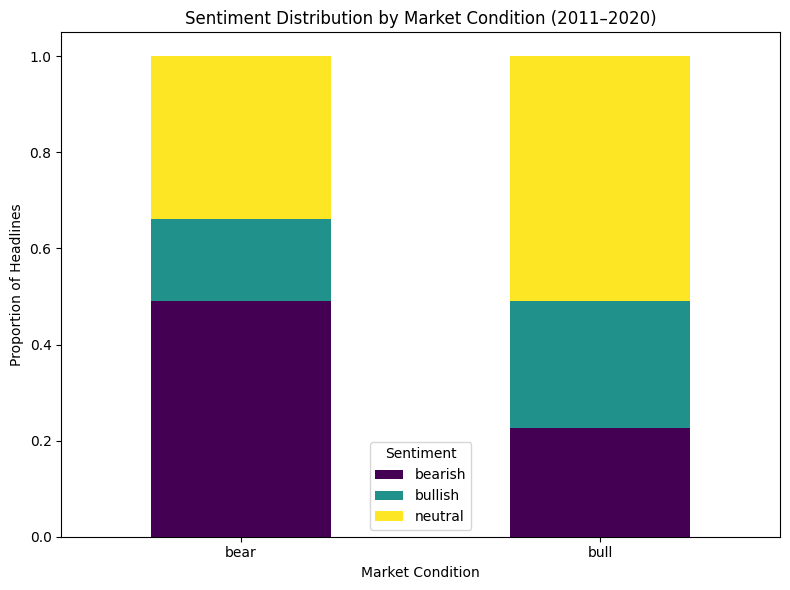

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


DATA_PATH = '/content/labeled_financial_news_2M_clean.csv'
df = pd.read_csv(DATA_PATH)


df['date'] = pd.to_datetime(df['date'], errors='coerce')


df = df.dropna(subset=['date'])


df['date'] = df['date'].dt.tz_localize(None)

df['sentiment'] = df['sentiment'].str.strip().str.lower()

valid_sentiments = ['bullish', 'bearish', 'neutral']
df = df[df['sentiment'].isin(valid_sentiments)]


def label_market_condition(date):
    if pd.Timestamp('2020-02-20') <= date <= pd.Timestamp('2020-03-23'):
        return 'bear'
    else:
        return 'bull'


df['market_condition'] = df['date'].apply(label_market_condition)


sentiment_by_market = df.groupby(['market_condition', 'sentiment']).size().unstack().fillna(0)


sentiment_by_market_pct = sentiment_by_market.div(sentiment_by_market.sum(axis=1), axis=0)


print("Sentiment Distribution by Market Condition (Normalized):")
print(sentiment_by_market_pct)


sentiment_by_market_pct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Sentiment Distribution by Market Condition (2011–2020)")
plt.ylabel("Proportion of Headlines")
plt.xlabel("Market Condition")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()




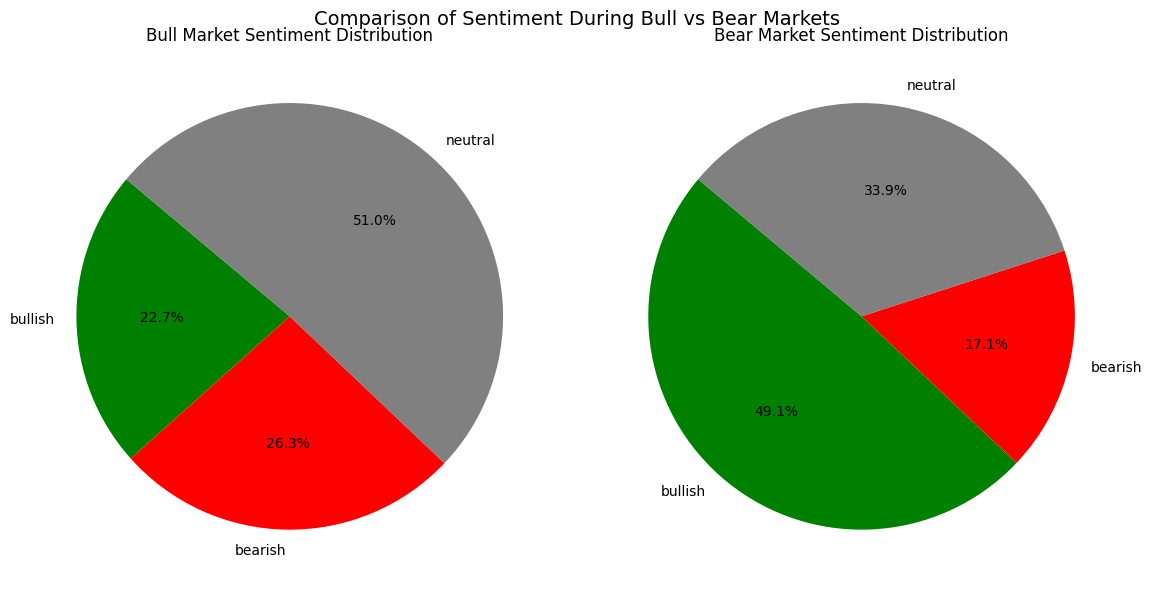

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['green', 'red', 'gray']
labels = ['bullish', 'bearish', 'neutral']

# Bull market pie chart
axs[0].pie(sentiment_by_market_pct.loc['bull'], labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axs[0].set_title('Bull Market Sentiment Distribution')

# Bear market pie chart
axs[1].pie(sentiment_by_market_pct.loc['bear'], labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axs[1].set_title('Bear Market Sentiment Distribution')

plt.suptitle("Comparison of Sentiment During Bull vs Bear Markets", fontsize=14)
plt.tight_layout()
plt.show()


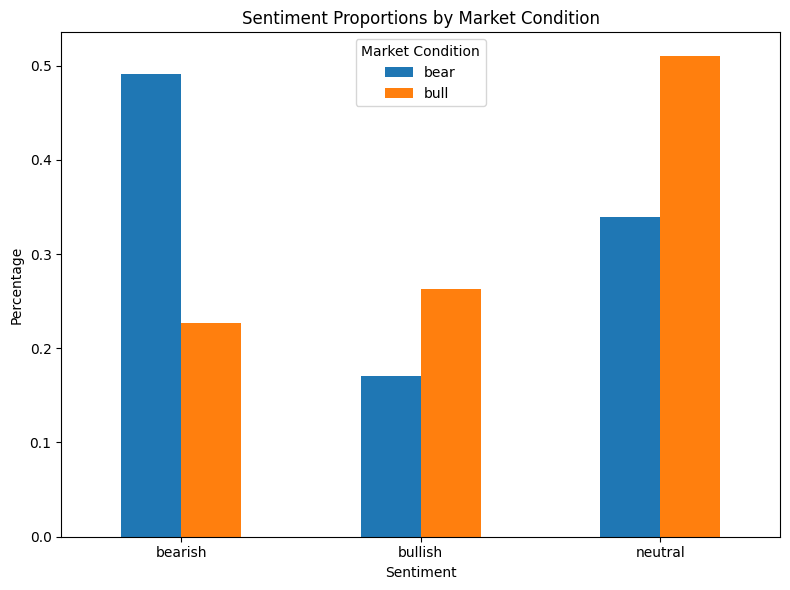

In [5]:
sentiment_by_market_pct.T.plot(kind='bar', figsize=(8, 6))
plt.title("Sentiment Proportions by Market Condition")
plt.ylabel("Percentage")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.legend(title='Market Condition')
plt.tight_layout()
plt.show()


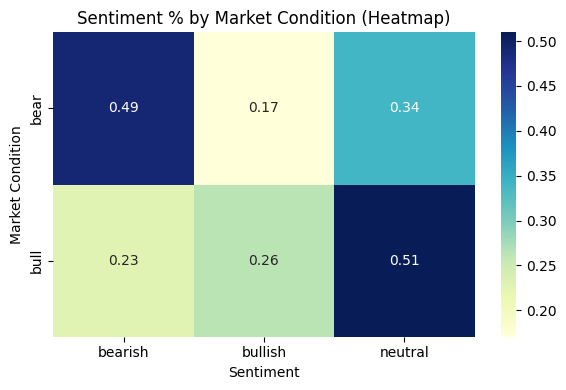

In [6]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(sentiment_by_market_pct, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Sentiment % by Market Condition (Heatmap)")
plt.ylabel("Market Condition")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()
